In [2]:
import networkx as nx
import osmnx as ox

ox.__version__

ModuleNotFoundError: No module named 'osmnx'

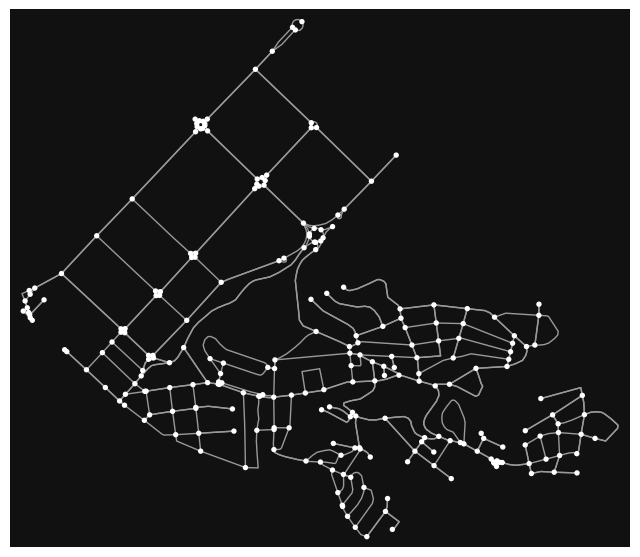

In [6]:
# download/model a street network for some city then visualize it
place = "Martorelles, Catalunya, Spain"
G = ox.graph.graph_from_place(place, network_type="drive")
fig, ax = ox.plot.plot_graph(G)

In [7]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [8]:
# Convert the graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
499147325,41.527124,2.226650,traffic_signals,4,POINT (2.22665 41.52712)
528821346,41.532853,2.235474,NaN,3,POINT (2.23547 41.53285)
528821354,41.533082,2.236016,NaN,3,POINT (2.23602 41.53308)
528821355,41.532693,2.236005,NaN,3,POINT (2.23601 41.53269)
528821358,41.533127,2.235697,NaN,3,POINT (2.2357 41.53313)


In [9]:
gdf_edges.head()

osmid   highway lanes      ref  oneway reversed  \
u         v          key                                                        
499147325 539684807  0     40968271  tertiary     2  BV-5001   False    False   
          1654036207 0     44923871  tertiary     2    B-500   False    False   
          1654036248 0    292395663  tertiary     2    B-500   False     True   
528821346 528821361  0     42354987  tertiary     2  BV-5001    True    False   
          4957959422 0     42354988  tertiary     1  BV-5001    True    False   

                             length  \
u         v          key              
499147325 539684807  0    34.270578   
          1654036207 0    25.247518   
          1654036248 0    75.671447   
528821346 528821361  0    31.310113   
          4957959422 0    49.642921   

                                                                   geometry  \
u         v          key                                                      
499147325 539684807  0    LINESTRING (2.22665 41.52712, 2.22677 41.52723...   
          1654036207 0    LINESTRING (2.22665 41.52712, 2.22677 41.52705...   
          1654036248 0    LINESTRING (2.22665 41.52712, 2.22648 41.52724...   
528821346 528821361  0    LINESTRING (2.23547 41.53285, 2.23549 41.5328,...   
          4957959422 0    LINESTRING (2.23547 41.53285, 2.23544 41.53272...   

                         maxspeed                  name    junction access  \
u         v          key                                                     
499147325 539684807  0        NaN                   NaN         NaN    NaN   
          1654036207 0         40  avinguda de Badalona         NaN    NaN   
          1654036248 0         40  avinguda de Badalona         NaN    NaN   
528821346 528821361  0        NaN                   NaN  roundabout    NaN   
          4957959422 0        NaN                   NaN         NaN    NaN   

                         bridge  
u         v          key         
499147325 539684807  0      NaN  
          1654036207 0      NaN  
          1654036248 0      NaN  
528821346 528821361  0      NaN  
          4957959422 0      NaN

## Basic street network stats

In [41]:
# What sized area does our network cover in square meters?
G_proj = ox.projection.project_graph(G)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

2446380.064426361

In [12]:
type(nodes_proj)

geopandas.geodataframe.GeoDataFrame

In [42]:
type(G_proj)

networkx.classes.multidigraph.MultiDiGraph

In [13]:
nodes_proj.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Show some basic stats about the network
ox.stats.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 244,
 'm': 509,
 'k_avg': 4.172131147540983,
 'edge_length_total': 46589.729444958124,
 'edge_length_avg': 91.53188496062499,
 'streets_per_node_avg': 2.9057377049180326,
 'streets_per_node_counts': {0: 0, 1: 23, 2: 5, 3: 190, 4: 24, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.0942622950819672,
  2: 0.020491803278688523,
  3: 0.7786885245901639,
  4: 0.09836065573770492,
  5: 0.00819672131147541},
 'intersection_count': 221,
 'street_length_total': 29961.945260534147,
 'street_segment_count': 345,
 'street_length_avg': 86.84621814647579,
 'circuity_avg': 1.0743123794416283,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 140,
 'node_density_km': 99.73920387436377,
 'intersection_density_km': 90.33755760751801,
 'edge_density_km': 19044.354604762815,
 'street_density_km': 12247.461339397305,
 'clean_intersection_density_km': 57.22741205906118}

### Betweenness Centrality

In [16]:
# Node betweenness centrality
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')
betweenness

{499147325: 0.038414447505356594,
 539684807: 0.05514743393531272,
 1654036207: 0.004115226337448559,
 1654036248: 0.020610141822263034,
 528821346: 0.12694282896303097,
 528821361: 0.14061490324116585,
 4957959422: 0.059466721082882694,
 528821354: 0.11934156378600821,
 528821358: 0.1192225283134374,
 528821355: 0.1196986702037207,
 528821364: 0.11957963473114987,
 569679596: 0.1270618644356018,
 569679592: 0.19618746386423153,
 5975800302: 0.14049586776859502,
 4957958918: 0.0,
 1650065040: 0.06762915348773935,
 2971246355: 0.06931265517124102,
 539684943: 0.0,
 1996664605: 0.003996190864877733,
 4957959434: 0.015814712784409754,
 569679607: 0.18792300105431417,
 569679601: 0.13837023432983028,
 569679616: 0.0875080774070673,
 569679603: 0.084872291942999,
 2959501376: 0.04224058769513315,
 569679605: 0.10803319389177975,
 569679610: 0.09667380879502091,
 2218639787: 0.049875863007176134,
 569679612: 0.0972349760228548,
 569679615: 0.0,
 12326998716: 0.038448457640376826,
 1232699872

In [26]:
# Edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')
edge_betweenness

{(499147325, 539684807, 0): 0.0219928489509546,
 (499147325, 1654036207, 0): 0.003895972475207448,
 (499147325, 1654036248, 0): 0.016191054442420562,
 (539684807, 499147325, 0): 0.022869864399919046,
 (539684807, 1650065040, 0): 0.027541658233825813,
 (539684807, 2971246355, 0): 0.00826418403831883,
 (1654036207, 499147325, 0): 0.008061795857788573,
 (1654036248, 499147325, 0): 0.011266275382850976,
 (1654036248, 1459925075, 0): 0.013155231734466708,
 (528821346, 528821361, 0): 0.10446603251703435,
 (528821346, 4957959422, 0): 0.025416582338258113,
 (528821361, 5975800302, 0): 0.1434426229508197,
 (4957959422, 528821361, 0): 0.03909465020576132,
 (4957959422, 1650065041, 0): 0.023864939620859477,
 (528821354, 528821358, 0): 0.12234365513054038,
 (528821358, 569679596, 0): 0.029076435269513597,
 (528821358, 569679592, 0): 0.0931491600890508,
 (528821355, 528821364, 0): 0.12269783444646834,
 (528821364, 528821354, 0): 0.11848141401875464,
 (528821364, 4957958918, 0): 0.004098360655737705

#### Visualisation

##### Nodes

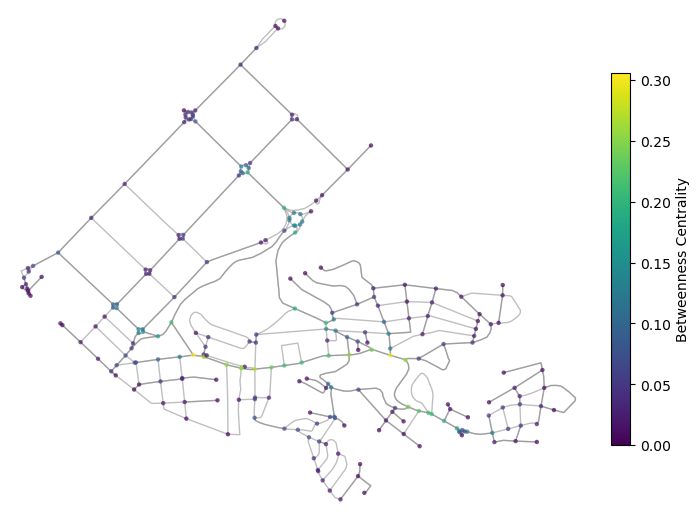

In [22]:
import matplotlib.pyplot as plt

# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')

# Assign betweenness as a node attribute
nx.set_node_attributes(G_proj, betweenness, 'betweenness')

# Visualize the graph
fig, ax = ox.plot_graph(
    G_proj, 
    node_color=[G_proj.nodes[n]['betweenness'] for n in G_proj.nodes()],
    node_size=10,
    node_alpha=0.7,
    edge_color='gray',
    edge_alpha=0.5,
    show=False,
    close=False,
    bgcolor='white'
)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Betweenness Centrality')

plt.show()

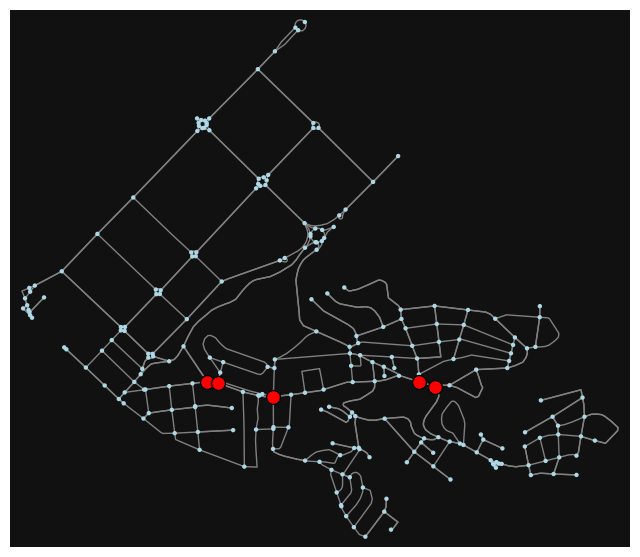

In [23]:
# Identify top 5 nodes by betweenness centrality
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:5]

# Extract node positions
node_x = [G_proj.nodes[n]['x'] for n in G_proj.nodes()]
node_y = [G_proj.nodes[n]['y'] for n in G_proj.nodes()]

# Plot the graph
fig, ax = ox.plot_graph(G_proj, node_size=10, node_color='lightblue', edge_color='gray', show=False, close=False)

# Highlight top nodes
for n in top_nodes:
    x = G_proj.nodes[n]['x']
    y = G_proj.nodes[n]['y']
    ax.scatter(x, y, c='red', s=100, edgecolors='black', zorder=5)

plt.show()

Computing betweenness centrality...
Betweenness centrality computed.
Visualizing the graph with betweenness centrality...


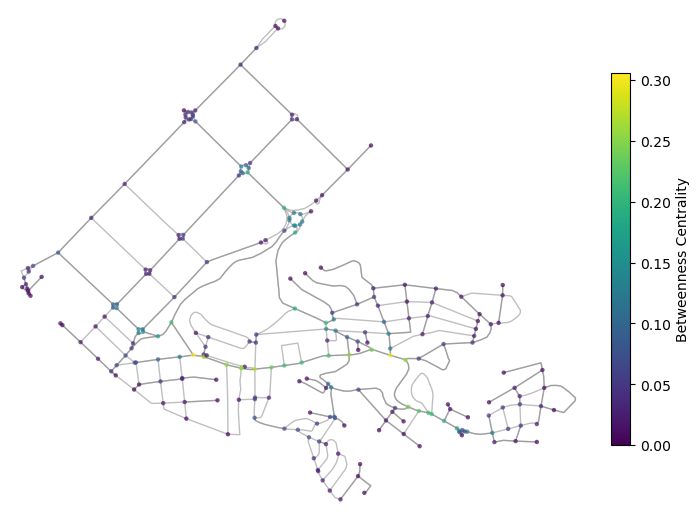

Top 5 nodes by betweenness centrality:
1. Node ID: 1650095911, Betweenness Centrality: 0.3058
2. Node ID: 1650065062, Betweenness Centrality: 0.3050
3. Node ID: 1650065039, Betweenness Centrality: 0.2953
4. Node ID: 1650091494, Betweenness Centrality: 0.2767
5. Node ID: 1644416851, Betweenness Centrality: 0.2591


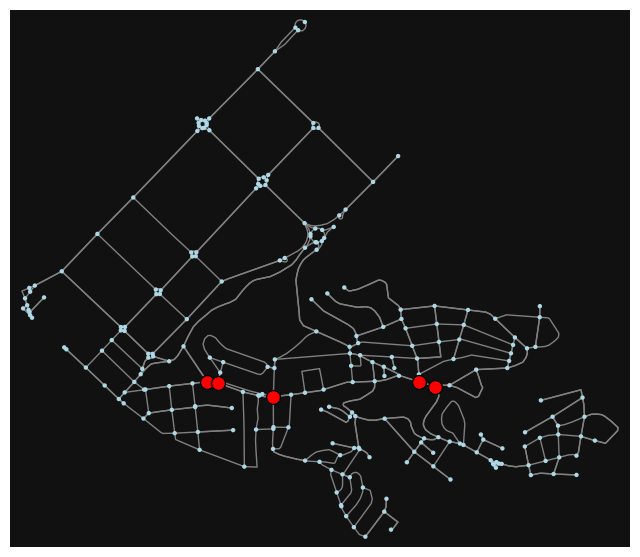

In [24]:
# 3. Compute betweenness centrality
print("Computing betweenness centrality...")
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')
print("Betweenness centrality computed.")

# 4. Assign betweenness as a node attribute
nx.set_node_attributes(G_proj, betweenness, 'betweenness')

# 5. Visualize the graph with betweenness centrality
print("Visualizing the graph with betweenness centrality...")
fig, ax = ox.plot_graph(
    G_proj, 
    node_color=[G_proj.nodes[n]['betweenness'] for n in G_proj.nodes()],
    node_size=10,
    node_alpha=0.7,
    edge_color='gray',
    edge_alpha=0.5,
    bgcolor='white',
    show=False,
    close=False
)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Betweenness Centrality')

plt.show()

# 6. Identify and highlight top 5 nodes
top_n = 5
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:top_n]
print(f"Top {top_n} nodes by betweenness centrality:")

for i, node in enumerate(top_nodes, start=1):
    print(f"{i}. Node ID: {node}, Betweenness Centrality: {betweenness[node]:.4f}")

# Optional: Visualize top nodes
fig, ax = ox.plot_graph(
    G_proj, 
    node_color='lightblue', 
    node_size=10, 
    edge_color='gray',
    show=False, 
    close=False
)

for node in top_nodes:
    x = G_proj.nodes[node]['x']
    y = G_proj.nodes[node]['y']
    ax.scatter(x, y, c='red', s=100, edgecolors='black', zorder=5)

plt.show()


##### Edges

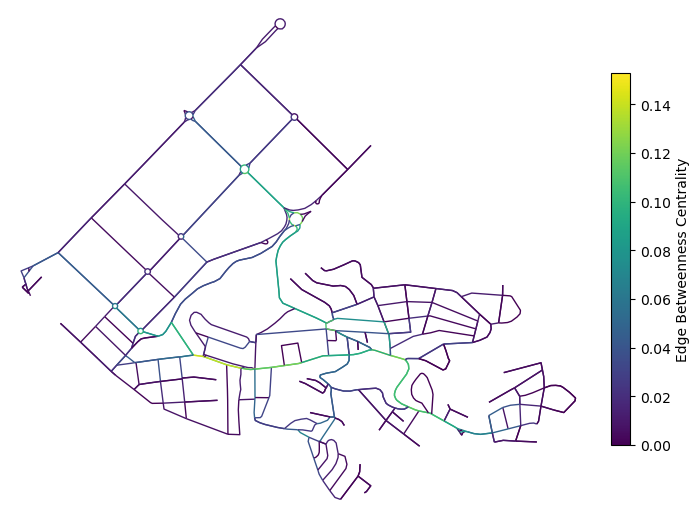

In [36]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

# 1. (Optional) Convert to MultiGraph or confirm you have one
#    If your G_proj is already a MultiGraph or MultiDiGraph, skip this step.
# G_proj = nx.MultiGraph(G_proj)

# 2. Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')

# 3. Collect betweenness values by iterating with keys=True
all_edges = list(G_proj.edges(keys=True))  # list of (u, v, k)
edge_betweenness_values = [edge_betweenness[(u, v, k)] 
                           for (u, v, k) in all_edges]

# 4. Create a colormap
cmap = plt.cm.viridis
norm = colors.Normalize(
    vmin=min(edge_betweenness_values),
    vmax=max(edge_betweenness_values)
)
edge_colors = [cmap(norm(value)) for value in edge_betweenness_values]

# 5. Plot the graph with OSMnx, using the same ordering for edges
fig, ax = ox.plot_graph(
    G_proj,
    edge_color=edge_colors,
    edge_linewidth=1,
    node_size=0,
    bgcolor='white',
    show=False,
    close=False
)

# 6. Add a colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Edge Betweenness Centrality')

plt.show()


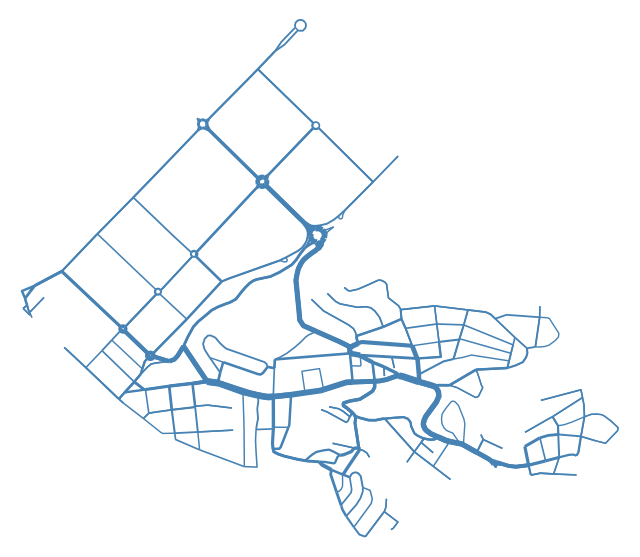

In [37]:
# Normalize betweenness for linewidth scaling
max_bet = max(edge_betweenness_values)
min_bet = min(edge_betweenness_values)
edge_widths = [1 + 4 * ((bet - min_bet) / (max_bet - min_bet)) for bet in edge_betweenness_values]

# Plot the graph with varying edge widths
fig, ax = ox.plot_graph(
    G_proj,
    edge_color='steelblue',
    edge_linewidth=edge_widths,
    node_size=0,  # Hide nodes for clarity
    bgcolor='white',
    show=False,
    close=False
)

# Optionally, add a legend or annotation for linewidth scaling

plt.show()


### Street angle orientation

#### Bearing

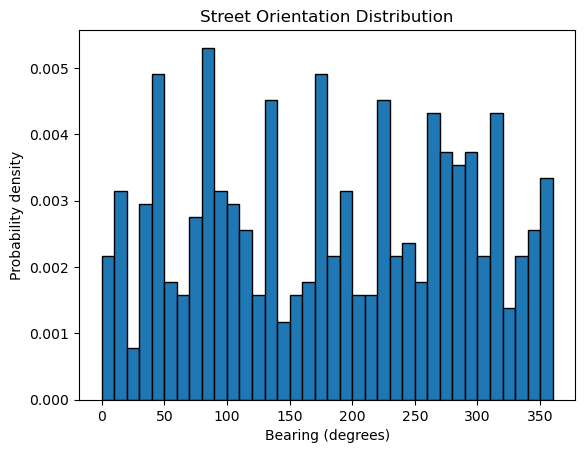

In [44]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# 1. Download (or load) a street network
place = "Martorelles, Catalunya, Spain"
G = ox.graph_from_place(place, network_type="drive")

# 3. Add edge bearings (in degrees) to each edge's attributes
G = ox.bearing.add_edge_bearings(G)

# 4. Convert edges to a GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# The bearing has been added to the edge attributes under the key "bearing"
orientations = edges["bearing"]  # In degrees from North, going clockwise

# 5. Bin these bearings to create an orientation histogram
num_bins = 36
counts, bin_edges = np.histogram(orientations, bins=num_bins, range=(0,360), density=True)

# 6. (Optional) Plot as a simple histogram, or use matplotlib’s polar plotting
plt.bar(bin_edges[:-1], counts, width=360/num_bins, edgecolor='k', align='edge')
plt.xlabel("Bearing (degrees)")
plt.ylabel("Probability density")
plt.title("Street Orientation Distribution")
plt.show()


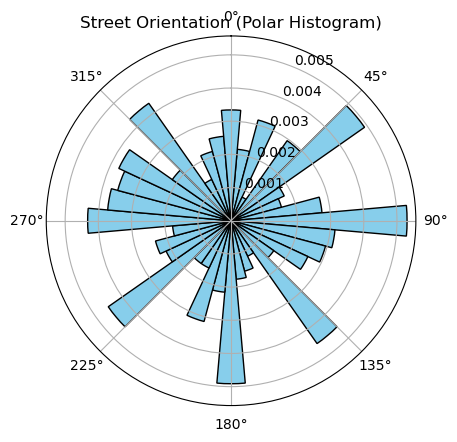

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose bin_edges is length num_bins+1, and counts is length num_bins
theta_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # midpoint of each bin, in degrees
theta_radians = np.radians(theta_centers)               # convert to radians

# A polar bar chart
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

# 'counts' can be probability density or absolute frequency
ax.bar(theta_radians, counts, 
       width=np.radians(360/num_bins), 
       bottom=0.0, 
       color='skyblue', 
       edgecolor='k', 
       align='edge')

ax.set_theta_direction(-1)   # make angles go clockwise
ax.set_theta_offset(np.radians(90))  # 0° at top
plt.title("Street Orientation (Polar Histogram)")
plt.show()


#### Orientation entropy

In [50]:
import math

# 1. Compute your city's orientation entropy
H0 = ox.bearing.orientation_entropy(ox.convert.to_undirected(G), num_bins=36, weight=None)

# 2. Define H_max and H_g
H_max = math.log(36)  # ~3.584913
H_g   = 1.386         # Boeing's "perfect 4-way grid" entropy in nats

# 3. Compute phi
phi = 1.0 - ((H0 - H_g) / (H_max - H_g))**2

print(f"Orientation-order phi = {phi:.4f}")

Orientation-order phi = 0.1014
